In [1]:
import os
import sys
import pandas as pd
import statsmodels.stats.multitest
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr   

In [2]:
# check for missing files (dropped by cluster)
tisList = os.listdir("/gymreklab-tscc/ydong/data/allTis/")
peerTis = []
count = 0
for currTis in tisList:
    
    for CHR in range(1,23):
        resPath = "/gymreklab-tscc/ydong/data/allTis/" +currTis+"/result/chr" + str(CHR) + "Res.csv"
        
        if not os.path.exists(resPath):
            count +=1
            print(currTis + ": "+str(CHR))
            peerTis.append(currTis)
peerTis = list(set(peerTis))        

Cervix-Endocervix: 1
Cervix-Endocervix: 2
Cervix-Endocervix: 3
Cervix-Endocervix: 4
Cervix-Endocervix: 5
Cervix-Endocervix: 6
Cervix-Endocervix: 7
Cervix-Endocervix: 8
Cervix-Endocervix: 9
Cervix-Endocervix: 10
Cervix-Endocervix: 11
Cervix-Endocervix: 12
Cervix-Endocervix: 13
Cervix-Endocervix: 14
Cervix-Endocervix: 15
Cervix-Endocervix: 16
Cervix-Endocervix: 17
Cervix-Endocervix: 18
Cervix-Endocervix: 19
Cervix-Endocervix: 20
Cervix-Endocervix: 21
Cervix-Endocervix: 22
Cervix-Ectocervix: 1
Cervix-Ectocervix: 2
Cervix-Ectocervix: 3
Cervix-Ectocervix: 4
Cervix-Ectocervix: 5
Cervix-Ectocervix: 6
Cervix-Ectocervix: 7
Cervix-Ectocervix: 8
Cervix-Ectocervix: 9
Cervix-Ectocervix: 10
Cervix-Ectocervix: 11
Cervix-Ectocervix: 12
Cervix-Ectocervix: 13
Cervix-Ectocervix: 14
Cervix-Ectocervix: 15
Cervix-Ectocervix: 16
Cervix-Ectocervix: 17
Cervix-Ectocervix: 18
Cervix-Ectocervix: 19
Cervix-Ectocervix: 20
Cervix-Ectocervix: 21
Cervix-Ectocervix: 22
Cells-Leukemiacellline_CML: 1
Cells-Leukemiacellli

In [3]:
count

110

In [4]:
peerTis

['Cervix-Ectocervix',
 'FallopianTube',
 'Cervix-Endocervix',
 'Kidney-Medulla',
 'Cells-Leukemiacellline_CML']

In [5]:
for i in peerTis:
    print(i)

Cervix-Ectocervix
FallopianTube
Cervix-Endocervix
Kidney-Medulla
Cells-Leukemiacellline_CML


In [6]:
# deal with errors on ids in result files
# for currTis in tisList:
#     if currTis in peerTis:
#         continue
#     resPath = "/gymreklab-tscc/ydong/data/allTis/" +currTis+"/fdrRes.csv"
#     newPath = "/gymreklab-tscc/ydong/data/allTis/" +currTis+"/fdrRes_New.csv"
#     fdr_df = pd.read_csv(resPath,index_col = 0)
#     fdr_df["str.id"] = fdr_df["str.id"].apply(lambda x: x.split("_")[1])
#     fdr_df["str.id"] = fdr_df["chrom"].astype(str) + "_" + fdr_df["str.id"]
#     fdr_df = fdr_df.reset_index()
#     fdr_df.to_csv(newPath)

In [7]:
fdr_dict = {}
for currTis in tisList:
    if currTis in peerTis:
        continue
    resPath = "/gymreklab-tscc/ydong/data/allTis/" +currTis+"/fdrRes_New.csv"
    fdr_df = pd.read_csv(resPath,index_col = 0)
    fdr_dict[currTis] = fdr_df

In [8]:
fdrTis = list(fdr_dict.keys())

In [9]:
fdrTis

['Brain-Substantianigra',
 'Spleen',
 'Brain-Cortex',
 'Adipose-Visceral_Omentum',
 'Brain-Hippocampus',
 'Thyroid',
 'Kidney-Cortex',
 'Artery-Coronary',
 'Prostate',
 'Artery-Tibial',
 'Esophagus-Muscularis',
 'Testis',
 'Ovary',
 'Vagina',
 'Esophagus-Mucosa',
 'Brain-FrontalCortex_BA9',
 'SmallIntestine-TerminalIleum',
 'Brain-Spinalcord_cervicalc-1',
 'Artery-Aorta',
 'Stomach',
 'Breast-MammaryTissue',
 'Brain-Nucleusaccumbens_basalganglia',
 'Muscle-Skeletal',
 'Skin-NotSunExposed_Suprapubic',
 'Heart-AtrialAppendage',
 'Brain-Cerebellum',
 'Skin-SunExposed_Lowerleg',
 'Heart-LeftVentricle',
 'Nerve-Tibial',
 'Pancreas',
 'Colon-Sigmoid',
 'Brain-Putamen_basalganglia',
 'Adipose-Subcutaneous',
 'Colon-Transverse',
 'Brain-Caudate_basalganglia',
 'MinorSalivaryGland',
 'Brain-CerebellarHemisphere',
 'Liver',
 'AdrenalGland',
 'Brain-Hypothalamus',
 'Bladder',
 'Cells-Culturedfibroblasts',
 'Cells-EBV-transformedlymphocytes',
 'Brain-Anteriorcingulatecortex_BA24',
 'Uterus',
 'Pit

In [10]:
strList = []
strSet = set()
for currTis in tisList:
    if currTis in peerTis:
        continue
    currDF = fdr_dict[currTis]
    strList.append(list(currDF["str.id"]))
    strSet = strSet | set(currDF["str.id"])

In [11]:
len(strSet)

17914

In [12]:
strAppCounts = []
for currSTR in strSet:
    currCount = 0
    for i in strList:
        if currSTR in i:
            currCount +=1
    strAppCounts.append(currCount)

In [15]:
len(set(strAppCounts))

49

Text(0.5, 0, 'STRs')

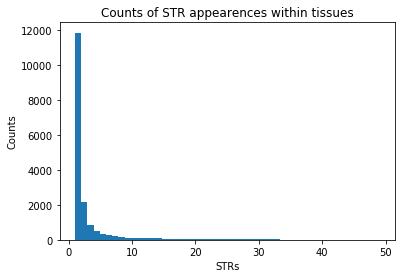

In [18]:
plt.hist(strAppCounts,49)
plt.title("Counts of STR appearences within tissues")
plt.ylabel("Counts")
plt.xlabel("STRs")

In [30]:
# count how many of them is larger than 40
count40 = 0
for i in strAppCounts:
    if i > 40:
        count40 +=1
count40

89

In [48]:
fdrCounts = []
for i in fdr_dict.keys():
    fdrCounts.append(len(fdr_dict[i]))
    if len(fdr_dict[i]) == 0:
        print(i)

Bladder


In [11]:
fdrCounts

[256,
 1056,
 851,
 2031,
 523,
 3107,
 38,
 951,
 902,
 2586,
 2172,
 3148,
 783,
 506,
 2097,
 833,
 697,
 437,
 1901,
 1186,
 1840,
 834,
 2103,
 2160,
 1412,
 1206,
 2623,
 905,
 2819,
 941,
 1507,
 581,
 2952,
 1573,
 840,
 338,
 1037,
 533,
 1093,
 673,
 0,
 3135,
 1085,
 519,
 547,
 1230,
 1446,
 1375,
 2520,
 326]

Text(0, 0.5, 'Counts')

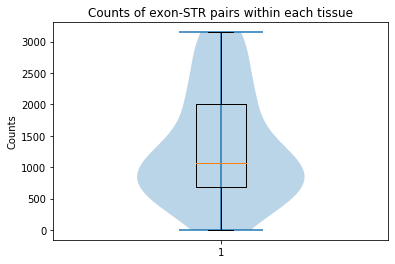

In [12]:
plt.violinplot(fdrCounts)
plt.boxplot(fdrCounts)
plt.title("Counts of exon-STR pairs within each tissue")
plt.ylabel("Counts")

In [13]:
Tis500 = []
Tis300 = []
Tis50 = []
for i in range(len(fdrTis)):
    if fdrCounts[i]<= 500:
        Tis500.append(fdrTis[i])
    if fdrCounts[i]<= 300:
        Tis300.append(fdrTis[i])
    if fdrCounts[i]<= 50:
        Tis50.append(fdrTis[i])

In [14]:
for i in Tis500:
    print(i)

Brain-Substantianigra
Kidney-Cortex
Brain-Spinalcord_cervicalc-1
MinorSalivaryGland
Bladder
Brain-Amygdala


In [15]:
for i in Tis300:
    print(i)

Brain-Substantianigra
Kidney-Cortex
Bladder


In [16]:
for i in Tis50:
    print(i)

Kidney-Cortex
Bladder


In [17]:
overlapSTR500 = []
start = True
for i in range(len(fdrTis)):
    if fdrTis[i] in Tis500:
        continue
    if start == True:
        overlapSTR500 = list(fdr_dict[fdrTis[i]]["str.id"].unique())
        start = False
    else:
        overlapSTR500 = list(set( overlapSTR500)&set(fdr_dict[fdrTis[i]]["str.id"].unique()))

In [18]:
overlapSTR300 = []
start = True
for i in range(len(fdrTis)):
    if fdrTis[i] in Tis300:
        continue
    if start == True:
        overlapSTR300 = list(fdr_dict[fdrTis[i]]["str.id"].unique())
        start = False
    else:
        overlapSTR300 = list(set( overlapSTR300)&set(fdr_dict[fdrTis[i]]["str.id"].unique()))

In [19]:
overlapSTR50 = []
start = True
for i in range(len(fdrTis)):
    if fdrTis[i] in Tis50:
        continue
    if start == True:
        overlapSTR50 = list(fdr_dict[fdrTis[i]]["str.id"].unique())
        start = False
    else:
        overlapSTR50 = list(set( overlapSTR50)&set(fdr_dict[fdrTis[i]]["str.id"].unique()))

In [58]:
overlapSTR0 = []
start = True
for i in range(len(fdrTis)):
    if fdrTis[i] == "Bladder":
        continue
    if start == True:
        overlapSTR0 = list(fdr_dict[fdrTis[i]]["str.id"].unique())
        start = False
    else:
        overlapSTR0 = list(set( overlapSTR0)&set(fdr_dict[fdrTis[i]]["str.id"].unique()))

In [47]:
fdrTis

['Brain-Substantianigra',
 'Spleen',
 'Brain-Cortex',
 'Adipose-Visceral_Omentum',
 'Brain-Hippocampus',
 'Thyroid',
 'Kidney-Cortex',
 'Artery-Coronary',
 'Prostate',
 'Artery-Tibial',
 'Esophagus-Muscularis',
 'Testis',
 'Ovary',
 'Vagina',
 'Esophagus-Mucosa',
 'Brain-FrontalCortex_BA9',
 'SmallIntestine-TerminalIleum',
 'Brain-Spinalcord_cervicalc-1',
 'Artery-Aorta',
 'Stomach',
 'Breast-MammaryTissue',
 'Brain-Nucleusaccumbens_basalganglia',
 'Muscle-Skeletal',
 'Skin-NotSunExposed_Suprapubic',
 'Heart-AtrialAppendage',
 'Brain-Cerebellum',
 'Skin-SunExposed_Lowerleg',
 'Heart-LeftVentricle',
 'Nerve-Tibial',
 'Pancreas',
 'Colon-Sigmoid',
 'Brain-Putamen_basalganglia',
 'Adipose-Subcutaneous',
 'Colon-Transverse',
 'Brain-Caudate_basalganglia',
 'MinorSalivaryGland',
 'Brain-CerebellarHemisphere',
 'Liver',
 'AdrenalGland',
 'Brain-Hypothalamus',
 'Bladder',
 'Cells-Culturedfibroblasts',
 'Cells-EBV-transformedlymphocytes',
 'Brain-Anteriorcingulatecortex_BA24',
 'Uterus',
 'Pit

In [20]:
len(overlapSTR500)

23

In [21]:
len(overlapSTR300)

16

In [22]:
len(overlapSTR50)

15

In [59]:
overlapSTR0

['19_45770205', '7_100356164', '12_103951635', '11_303493', '16_1960226']

In [23]:
for i in overlapSTR50:
    print(i)

19_45770205
7_100356164
15_76301705
12_103951635
8_11856856
11_303493
7_30569341
16_89532773
2_101280177
16_1960226
14_22573182
22_23695439
17_7629376
8_108240980
2_131483718


In [24]:
# get genes
spliceSTR_Exon = pd.DataFrame(columns = list(fdr_dict["Lung"].columns)+["tissue"])
for i in range(len(fdrTis)):
    if fdrTis[i] in Tis50:
        continue
    currTis = fdr_dict[fdrTis[i]]
    currIdx = []
    for j in currTis.index:
        if currTis["str.id"][j] in overlapSTR50:
            currIdx.append(j)
    currSTR = currTis.loc[currIdx,:].drop(["index"],axis = 1)
    currSTR["tissue"] = fdrTis[i]
    spliceSTR_Exon = spliceSTR_Exon.append(currSTR)
    

/usr/local/lib64/python3.6/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [25]:
spliceSTR_Exon = spliceSTR_Exon.drop(["index"],axis = 1)

In [26]:
spliceSTR_Exon.to_csv("/storage/ydong/data/spliceSTR/pairs.csv")

In [27]:
# getting the closest distance from exon to STR starting point

startD = list(spliceSTR_Exon["start.dist"])
stopD = list(spliceSTR_Exon["stop.dist"])

## startD always > stopD

closestD = []
farthestD = []
for i in range(len(startD)):
    currB = startD[i]
    currE = stopD[i]
    if currE > 0:
        closestD.append(currE)
        farthestD.append(currB)
    elif currB < 0:
        closestD.append(currB)
        farthestD.append(currE)
    else:
        if abs(currE) > abs(currB):
            closestD.append(currB)
            farthestD.append(currE) 
        else:
            closestD.append(currE)
            farthestD.append(currB)
    
    
    
    
spliceSTR_Exon["close"] = closestD
spliceSTR_Exon["far"] = farthestD


In [28]:
for i in range(len(startD)):
    if (startD[i] - stopD[i]) < 0 :
        print("fdsafasdafs")

In [29]:
spliceSTR_Exon

,chrom,correctedP,error,error_p,gene,n.miss,newP,pVal,pVal_p,slope,slope_p,start.dist,stop.dist,str.id,str.start,tissue,close,far
34,2,3.271074e-04,0.089861,0.110451,ENSG00000163162.8_9,5,8.860022e-07,1.476670e-07,0.109641,0.528620,0.179116,7335.0,7242.0,2_101280177,101280177,Brain-Substantianigra,7242.0,7335.0
36,2,1.085843e-04,0.099336,0.123381,ENSG00000173272.15_5,3,2.177186e-07,1.814322e-08,0.302903,0.633860,-0.128081,-240.0,-500.0,2_131483718,131483718,Brain-Substantianigra,-240.0,-500.0
88,7,1.799344e-03,0.102323,0.132731,ENSG00000196295.11_9,16,6.013003e-06,2.004334e-06,0.363340,-0.543731,-0.121665,-3659.0,-4441.0,7_30569341,30569341,Brain-Substantianigra,-3659.0,-4441.0
89,7,1.519177e-02,0.099964,0.129213,ENSG00000196295.11_12,16,8.657190e-05,1.442865e-05,0.235265,0.475900,-0.155062,5197.0,4543.0,7_30569341,30569341,Brain-Substantianigra,4543.0,5197.0
99,7,4.770691e-05,0.111839,0.160380,ENSG00000121716.20_7,26,7.887382e-08,1.126769e-08,0.991975,0.779582,-0.001622,-1216.0,-1371.0,7_100356164,100356164,Brain-Substantianigra,-1216.0,-1371.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,16,8.038010e-12,0.070108,0.137969,ENSG00000140988.15_2,28,2.310271e-15,3.850451e-16,0.271882,-0.806310,0.153157,-4050.0,-4141.0,16_1960226,1960226,Brain-Amygdala,-4050.0,-4141.0
249,16,1.488291e-03,0.070665,0.127243,ENSG00000197912.14_15,20,5.793701e-06,6.437445e-07,0.170609,0.391843,0.176401,-3992.0,-4948.0,16_89532773,89532773,Brain-Amygdala,-3992.0,-4948.0
252,17,1.057046e-03,0.086997,0.112670,ENSG00000141504.11_4,4,3.797679e-06,2.531786e-07,0.734868,-0.491362,-0.038293,2433.0,2332.0,17_7629376,7629376,Brain-Amygdala,2332.0,2433.0
295,19,1.991154e-12,0.073562,0.108726,ENSG00000104936.17_16,12,5.007572e-16,8.345953e-17,0.260300,0.804776,-0.123390,488.0,-435.0,19_45770205,45770205,Brain-Amygdala,-435.0,488.0
